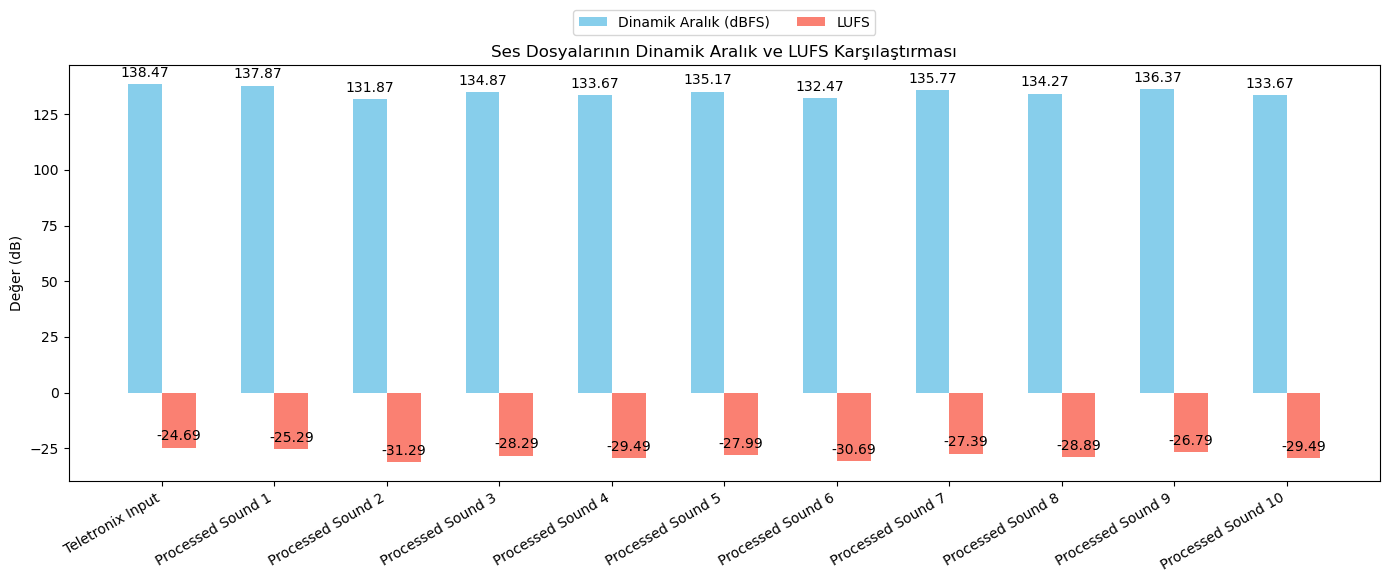

In [9]:
# Librosa sisteminin aktarılması

import matplotlib.pyplot as plt # Grafik ve görselleştirme işlemleri için Matplotlib kütüphanesini yükler.
import numpy as np # Bilimsel hesaplama ve dizi işlemleri için NumPy kütüphanesini yükler.
import librosa # Ses işleme ve analiz için Librosa kütüphanesini yükler.
import librosa.display # Librosa’nın ses grafikleri çizme fonksiyonlarını yükler.
import pyloudnorm as pyln  # LUFS analiziniyapar.
import IPython.display as ipd # Ses dosyalarını Jupyter'da çalmak için gerekli IPython fonksiyonlarını yükler.
from IPython.display import Audio, display  # Ses dosyalarını Jupyter hücresinde oynatmaya olanak tanır.

# Ses dosyalarının yollarını bir listeye ekleme
audio_files = [
    "/Users/nazimerensahin/Desktop/fldr/teletro.wav",  
    "/Users/nazimerensahin/Desktop/fldr/22.wav",      
    "/Users/nazimerensahin/Desktop/fldr/33.wav",
    "/Users/nazimerensahin/Desktop/fldr/44.wav",
    "/Users/nazimerensahin/Desktop/fldr/55.wav",
    "/Users/nazimerensahin/Desktop/fldr/66.wav",
    "/Users/nazimerensahin/Desktop/fldr/77.wav",
    "/Users/nazimerensahin/Desktop/fldr/88.wav",
    "/Users/nazimerensahin/Desktop/fldr/99.wav",
    "/Users/nazimerensahin/Desktop/fldr/1010.wav",
    "/Users/nazimerensahin/Desktop/fldr/1111.wav",
]

# Her dosya için açıklayıcı isimler ekleme
audio_labels = [
    "Teletronix Input",
    "Processed Sound 1",
    "Processed Sound 2",
    "Processed Sound 3",
    "Processed Sound 4",
    "Processed Sound 5",
    "Processed Sound 6",
    "Processed Sound 7",
    "Processed Sound 8",
    "Processed Sound 9",
    "Processed Sound 10",
]

# LUFS hesaplama aracı
meter = pyln.Meter(44100)  # Örnekleme hızı belirtilmeli

# Analiz sonuçlarını saklamak için listeler
dr_values = []
lufs_values = []

for file in audio_files:
    # Ses dosyasını yükleme
    y, sr = librosa.load(file, sr=None)
    
    # Dinamik Aralık (DR) Hesaplama
    max_val = np.max(np.abs(y))  # Maksimum genlik
    min_val = np.min(np.abs(y[np.abs(y) > 0]))  # Sıfır olmayan minimum genlik
    
    if min_val > 0:  # Sıfıra bölmeyi önlemek için kontrol
        dynamic_range = 20 * np.log10(max_val / min_val)
    else:
        dynamic_range = -np.inf  # Sonsuz ya da işlenemez değer
    
    dr_values.append(dynamic_range)
    
    # LUFS Hesaplama
    loudness = meter.integrated_loudness(y)
    lufs_values.append(loudness)

# Grafik Çizimi
x = np.arange(len(audio_labels))  # Çubukların x ekseni konumları
width = 0.3  # Çubuk genişliği

fig, ax = plt.subplots(figsize=(14, 6))

# Çubuklar
bar1 = ax.bar(x - width / 2, dr_values, width, label='Dinamik Aralık (dBFS)', color='skyblue')
bar2 = ax.bar(x + width / 2, lufs_values, width, label='LUFS', color='salmon')

# Çubukların üzerine değer yazdırma
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Çubuğun üstüne biraz boşluk
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

# Grafik başlık ve etiketler
ax.set_ylabel('Değer (dB)')
ax.set_title('Ses Dosyalarının Dinamik Aralık ve LUFS Karşılaştırması')
ax.set_xticks(x)
ax.set_xticklabels(audio_labels, rotation=30, ha='right')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.tight_layout()
plt.show()

In [10]:
rampa dinamiği ekle

NameError: name 'sound1' is not defined